# Intro

Hello there! Thanks for reaching out my notebook.

A lot of people like travelling and at least once in life everyone rented appartment, house, hotel etc. Nowadays we have a great variety of choice litterally for all kinds of budget. Couple of days ago I found out this wonderful dataset and I'd like to represent my EDA and ML model.

Enjoy! ;)

# EDA

## Importing data and extensions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let's fix the pictures size. I like when plots and graphs are huge and everything is clearly visible.

In [146]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
df = pd.read_csv('Aemf1.csv')

In [5]:
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [6]:
df.isna().mean()

City                           0.0
Price                          0.0
Day                            0.0
Room Type                      0.0
Shared Room                    0.0
Private Room                   0.0
Person Capacity                0.0
Superhost                      0.0
Multiple Rooms                 0.0
Business                       0.0
Cleanliness Rating             0.0
Guest Satisfaction             0.0
Bedrooms                       0.0
City Center (km)               0.0
Metro Distance (km)            0.0
Attraction Index               0.0
Normalised Attraction Index    0.0
Restraunt Index                0.0
Normalised Restraunt Index     0.0
dtype: float64

Not very often I see so clear notebooks without NaN and incorrect types of data.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,41714.0,260.094423,279.408493,34.779339,144.016085,203.819274,297.373358,18545.450285
Person Capacity,41714.0,3.237235,1.299459,2.000000,2.000000,3.000000,4.000000,6.000000
Multiple Rooms,41714.0,0.295273,0.456171,0.000000,0.000000,0.000000,1.000000,1.000000
Business,41714.0,0.341180,0.474112,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,41714.0,9.442274,0.889173,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,41714.0,93.103179,8.141745,20.000000,90.000000,95.000000,98.000000,100.000000
Bedrooms,41714.0,1.165939,0.638157,0.000000,1.000000,1.000000,1.000000,10.000000
City Center (km),41714.0,2.679792,1.996684,0.015045,1.275913,2.253237,3.584489,25.284557
Metro Distance (km),41714.0,0.603921,0.706206,0.002301,0.236693,0.391220,0.678702,14.273577
Attraction Index,41714.0,293.905990,235.750055,15.152201,124.371614,228.920599,394.000201,4513.563486


Let's check out distribution of our data. Which city is the most frequently shown in the table.

Text(0, 0.5, 'Count')

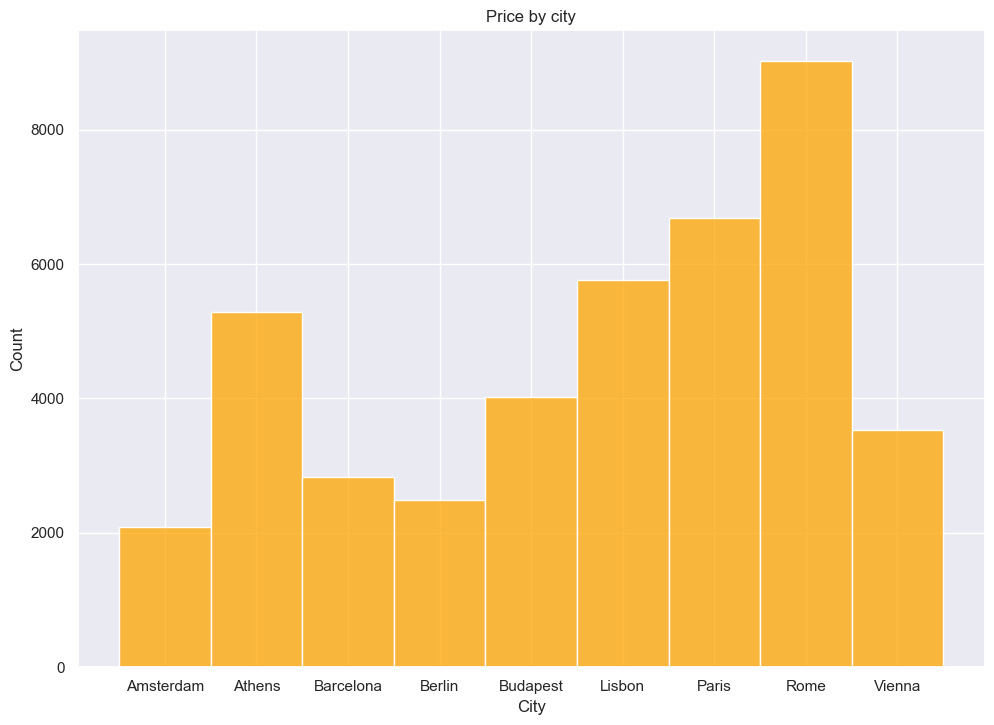

In [157]:
sns.histplot(data = df, x = 'City', bins = 20, color='orange', alpha=0.75)
plt.title('Price by city')
plt.xlabel('City')
plt.ylabel('Count')

Text(0, 0.5, 'Quantity')

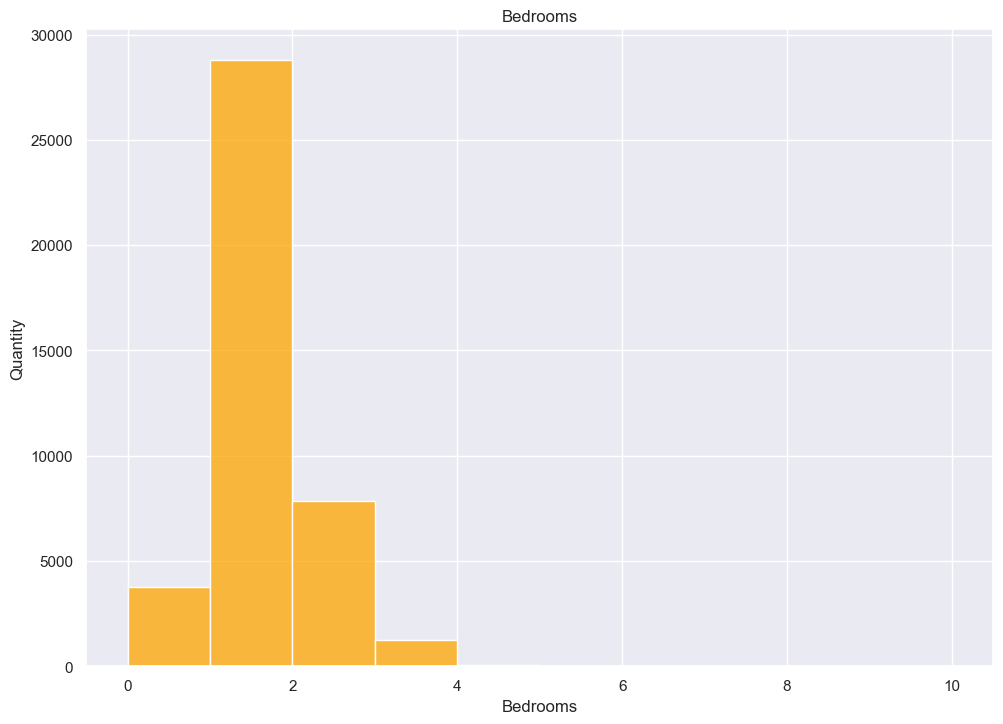

In [156]:
# the easiest way
# df['Bedrooms'].value_counts().plot(kind='barh')
# plt.show()


sns.histplot(data = df, x = 'Bedrooms', bins = 10, color='orange', alpha=0.75)
plt.title('Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Quantity')

## Heatmap overview

/var/folders/ty/y3x46lx53jb4q5wrxljsfp5r0000gn/T/ipykernel_1209/776416495.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


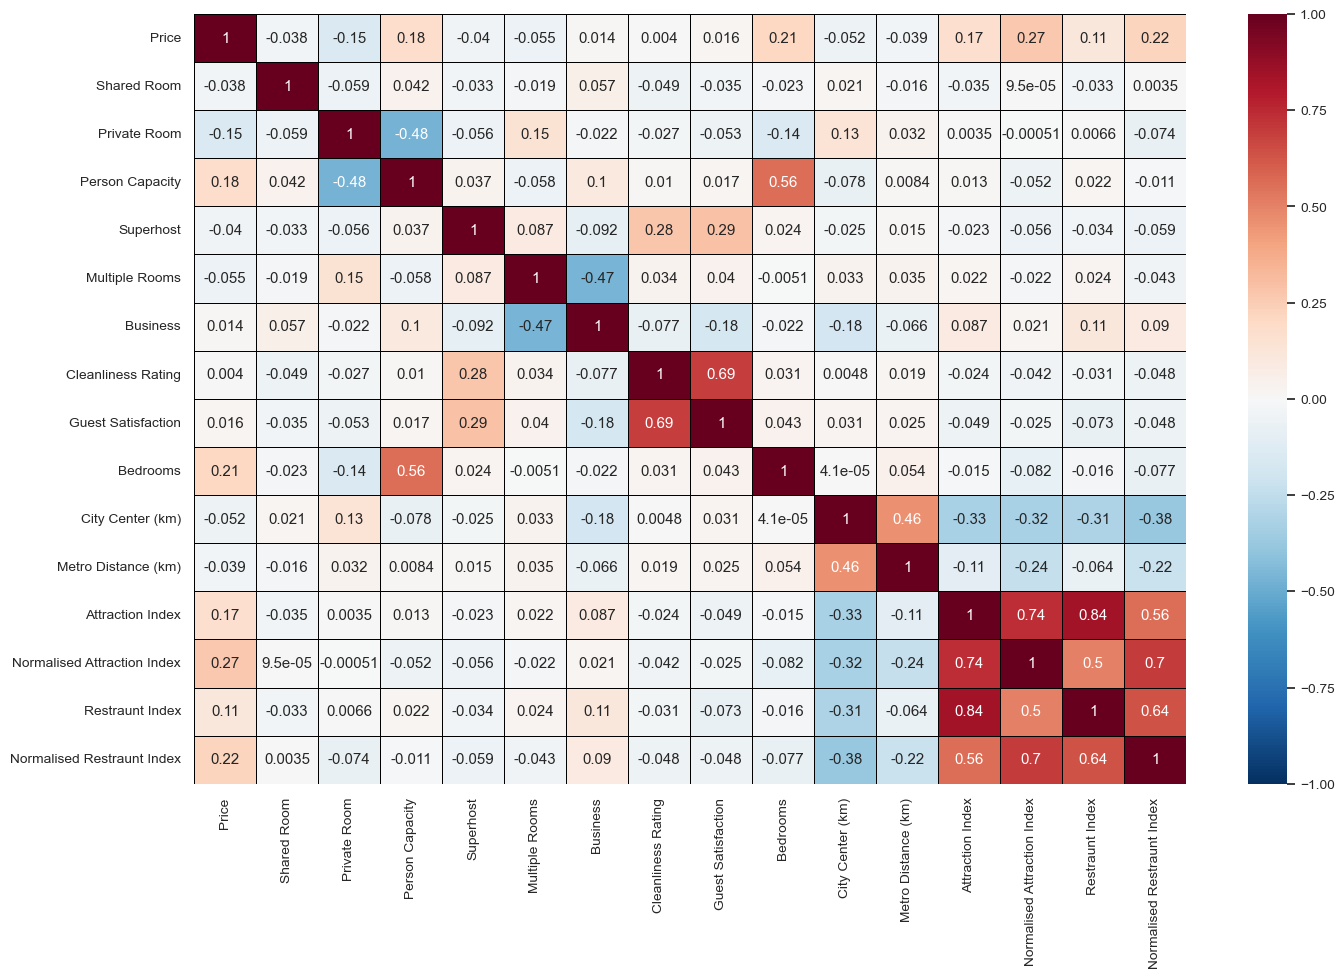

In [170]:
sns.set(font_scale=0.9)
plt.figure(figsize=(16,10))
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1,
    linewidths=0.5, 
    linecolor='black',
    square=False,
); # указывает начало цветовых кодов от -1 до 1.

Here we can see that some some obvious dependencies like 'price - bedrooms', 'Cleanliness Rating - Guest Satisfaction' or 'person capacity - bedrooms'. Before I checked this heatmap I also supposed that rentlal price depends on the distance to the city center but now I see I was wrong.

## Price dependency

Now let's check the distribution of prices and paint it in different colors depending on cities.

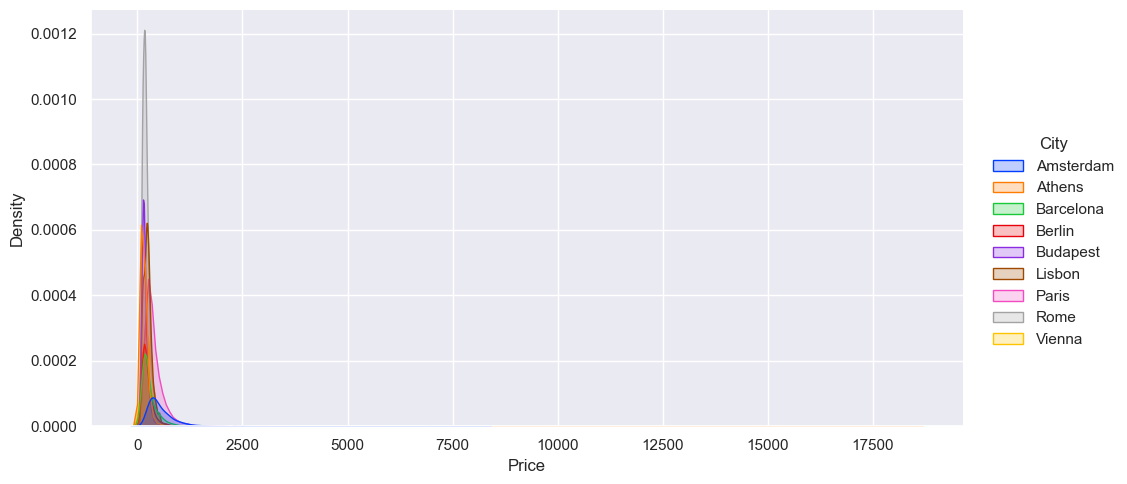

In [160]:
sns.displot(data=df, x='Price', hue='City', kind='kde', fill=True, palette=sns.color_palette('bright')[:9], height=5, aspect=2)

Here we can see that because of some accomodations have rather high price we can't talk about normal distribution at all. Also it's absolutely impossible to evaluate any data normally via this plot. I'll apply 'log10' to the data to remove influence of extremely high values.

In [28]:
df_log = df.copy()

df_log['Price'] = np.log10(df_log['Price'])
df_log.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,2.287877,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,2.536869,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,2.421771,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,2.637019,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,2.686237,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [29]:
df_log['Price'].describe()

count    41714.000000
mean         2.330832
std          0.248163
min          1.541321
25%          2.158411
50%          2.309245
75%          2.473302
max          4.268237
Name: Price, dtype: float64

After applied log10 we see that our 'Price' column now in range of '1.541 - 4.268'. Now I can prepare 3 plots. I decided to check how the price depends on city, day of the week and person capacity.

/var/folders/ty/y3x46lx53jb4q5wrxljsfp5r0000gn/T/ipykernel_1209/191248546.py:10: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.displot(data=df_log,
/var/folders/ty/y3x46lx53jb4q5wrxljsfp5r0000gn/T/ipykernel_1209/191248546.py:19: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.displot(data=df_log,


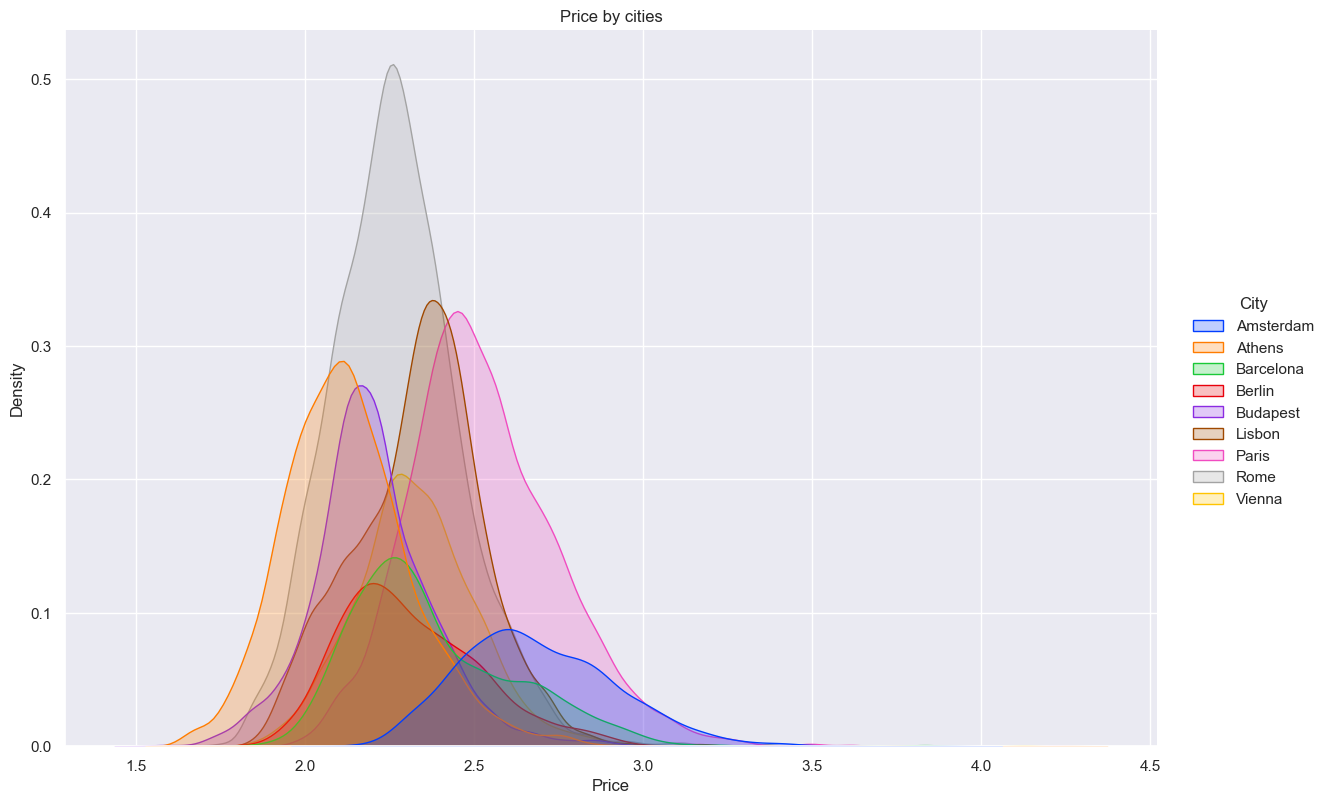

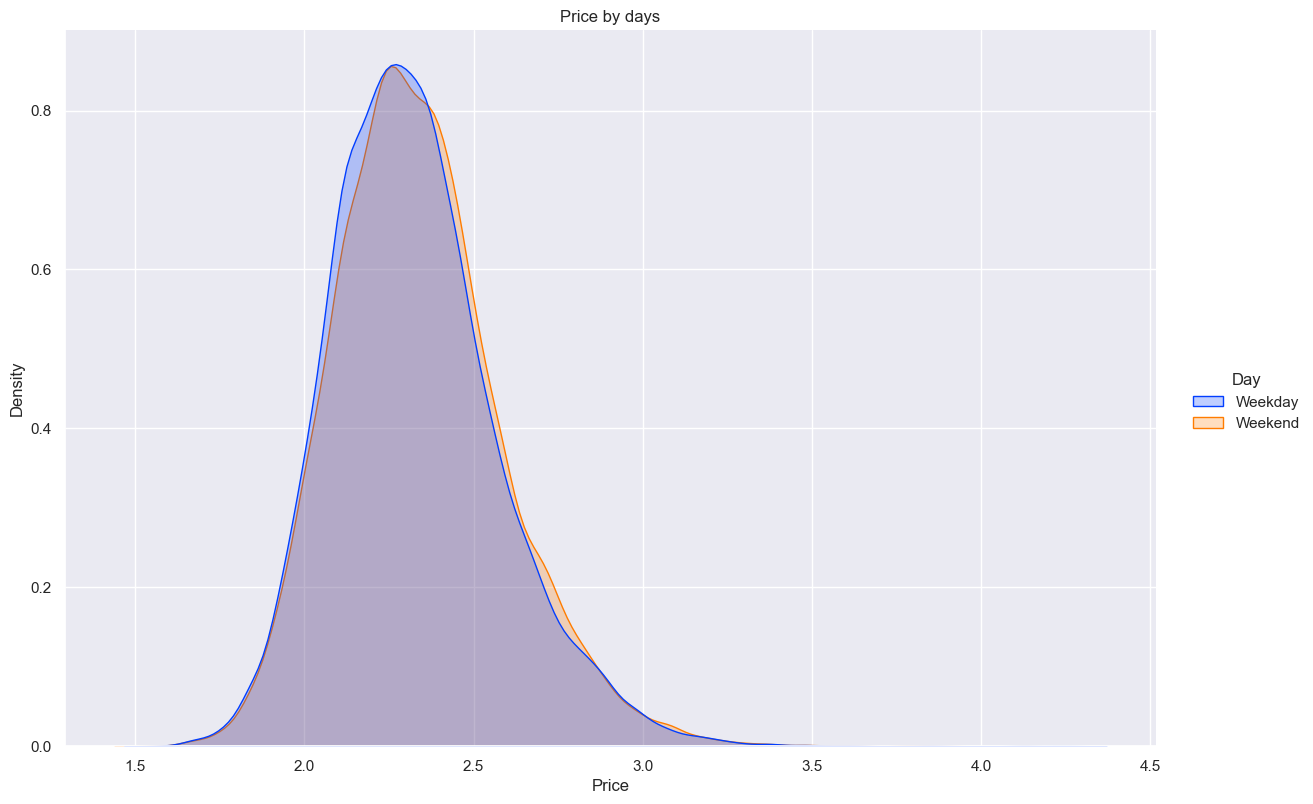

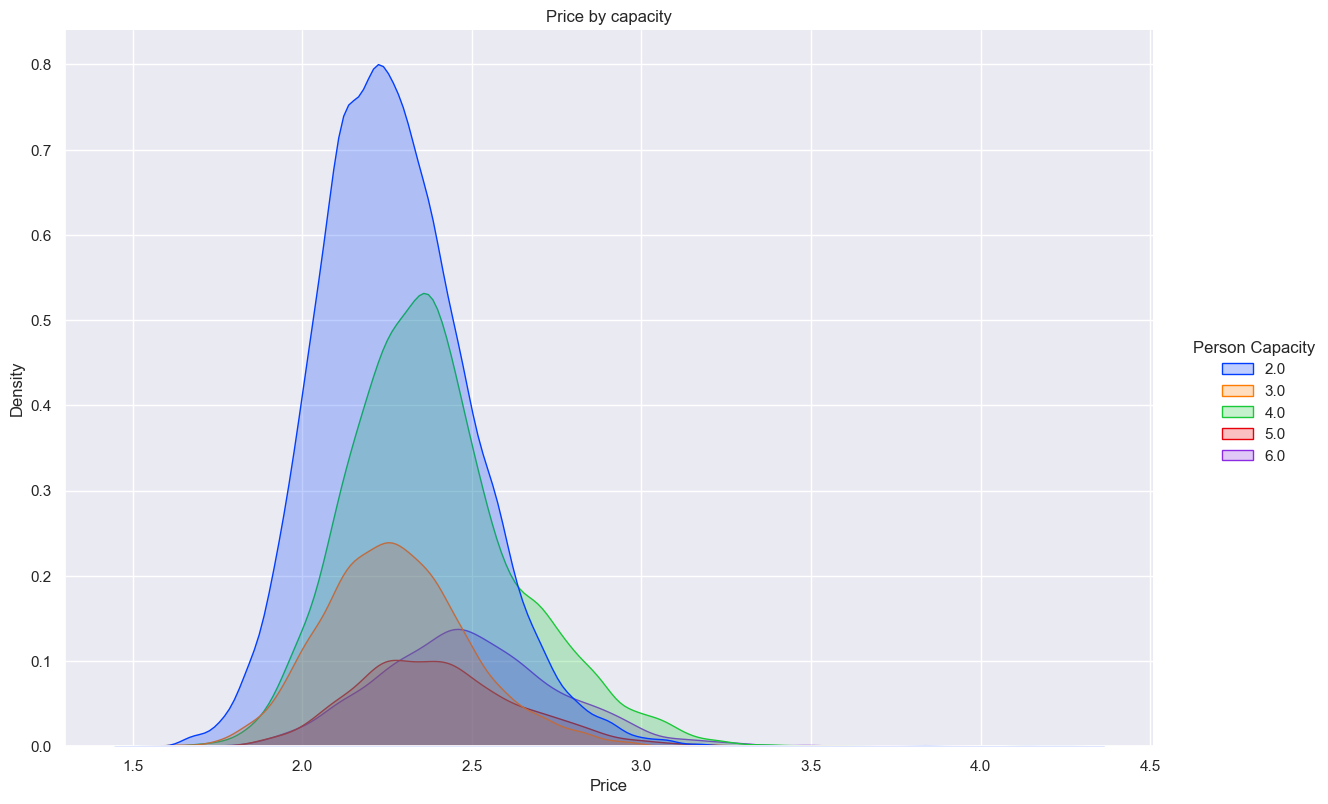

In [148]:
sns.displot(data=df_log, 
            x='Price', 
            hue='City', 
            kind='kde', 
            fill=True, 
            palette=sns.color_palette('bright')[:9], 
            height=8, 
            aspect=1.5).set(title='Price by cities')

sns.displot(data=df_log, 
            x='Price', 
            hue='Day', 
            kind='kde', 
            fill=True, 
            palette=sns.color_palette('bright')[:9], 
            height=8, 
            aspect=1.5).set(title='Price by days')

sns.displot(data=df_log, 
            x='Price', 
            hue='Person Capacity', 
            kind='kde', 
            fill=True, 
            palette=sns.color_palette('bright')[:9], 
            height=8, 
            aspect=1.5).set(title='Price by capacity')

Follow these graphs we can already suggest a couple of conclusions:

-The most part of our accomodation objects is represented by Rome. Objects in Athenes some cheaper, Amsterdam and Paris are more expensive than others;  

-Price absolutely doesn't depend on day of the week. On weekends and week days prices are mostly similar and no any difference in which day to rent;

-Follow the 3rd graph we can conclude at least 2 things. The 1st one is that in our dataset most objects are offering accomodation with person capacity = 2. The 2nd is that prices are also almost similar to each other, but we see some differences at object where can stay 4 persons but it's not very significant.

## Cleanliness and guest satisfaction

Let's check is the guest satisfaction depends on cleanliness. While my trips it's pretty important to stay in a clean room without filled thrash cans and roaches :D

Let's use standard boxplot from seaborn

<Axes: xlabel='Cleanliness Rating', ylabel='Guest Satisfaction'>

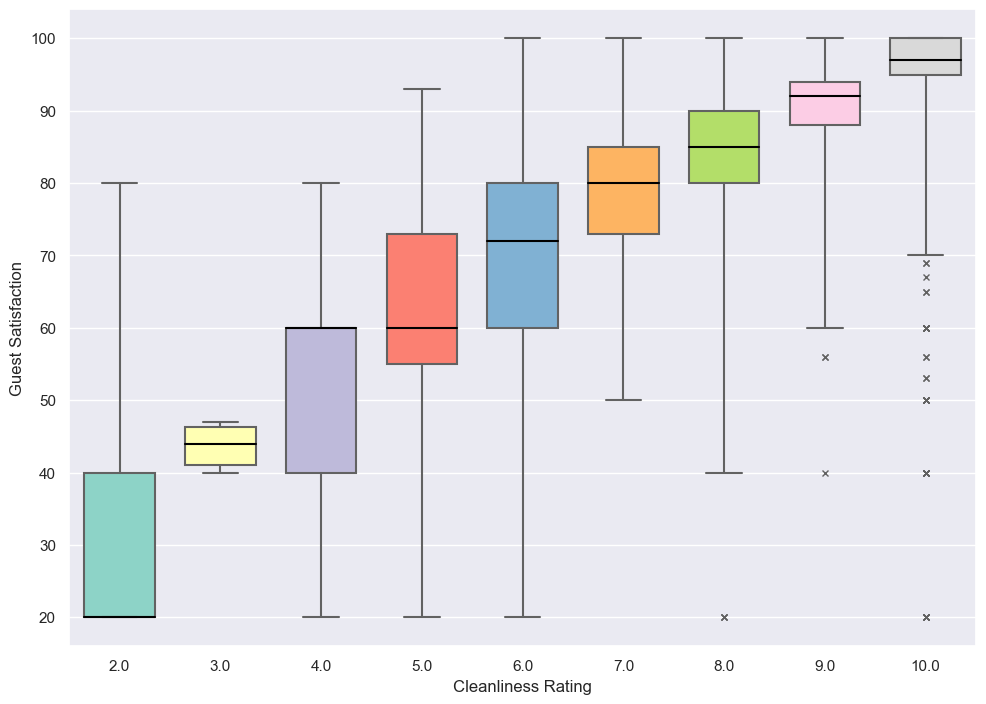

In [147]:
sns.boxplot(data=df, 
            x='Cleanliness Rating', 
            y='Guest Satisfaction', 
            palette='Set3',
            saturation=1,
            width=0.7,
            whis=5,
            medianprops={"color": "black"},
            flierprops={"marker": "x"}
           )

Well, we've got what was already approved by heatmap. Visitors leave the best satisfaction rating if the house was cleaned perfectly.

## Distance to the city center and guest satisfaction

In [116]:
#interval_range = pd.interval_range(start=0, freq=3, end=28, closed='left')

cut_bins_distance = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
cut_labels_city_center = ['0-3km', '3-6km', '6-9km', '9-12km', '12-15km', '15-18km', '18-21km', '21-24km', '24-27km']
df['cut_labels_city_center'] = pd.cut(df['City Center (km)'], bins=cut_bins_distance, labels = cut_labels_city_center)
df.head(1)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,...,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,cut_labels_city_center,cut_labels_satisfaction
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,...,93.0,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473,3-6km,90-100


[Text(0.5, 1.0, 'City center distance - Price')]

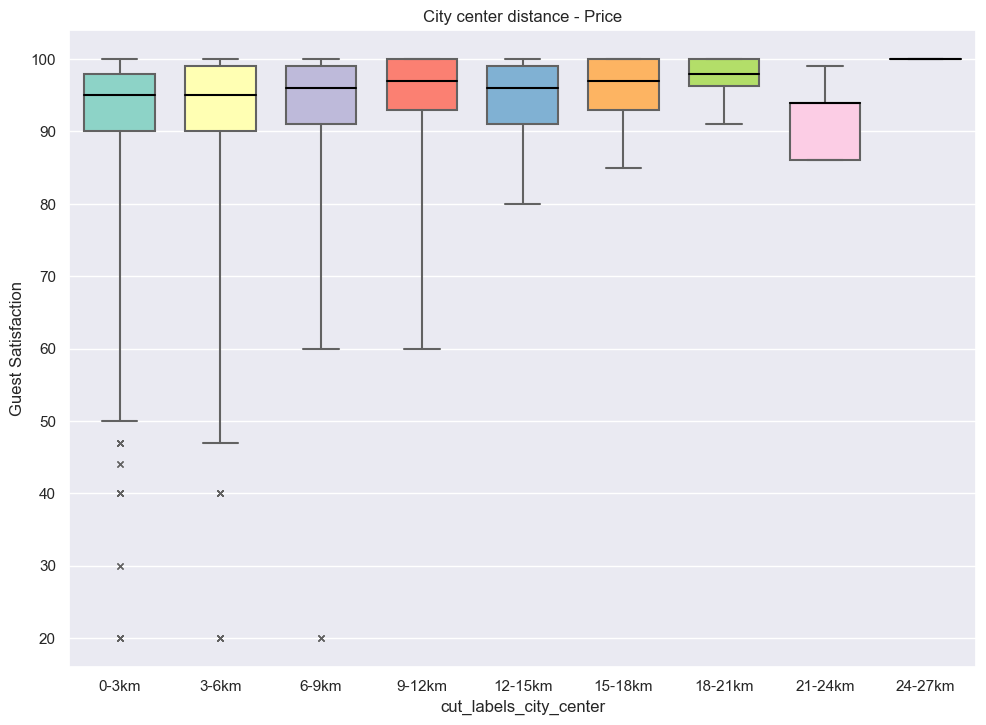

In [149]:
sns.boxplot(data=df, 
            x='cut_labels_city_center', 
            y='Guest Satisfaction', 
            palette='Set3',
            saturation=1,
            width=0.7,
            whis=5,
            medianprops={"color": "black"},
            flierprops={"marker": "x"}
           ).set(title='City center distance - Price')

Mostly we see that satisfaction of guests doesn't depend on the distance to the centers. It means that pretty good accomodation variants could be rather far away from the centers.

## Price and guest satisfaction

Let's split our data for groups

In [117]:
cut_bins_satisfaction = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
cut_labels_satisfaction = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['cut_labels_satisfaction'] = pd.cut(df['Guest Satisfaction'], bins=cut_bins_satisfaction, labels = cut_labels_satisfaction)
df.head(1)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,...,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,cut_labels_city_center,cut_labels_satisfaction
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,...,93.0,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473,3-6km,90-100


/var/folders/ty/y3x46lx53jb4q5wrxljsfp5r0000gn/T/ipykernel_1209/1959457262.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


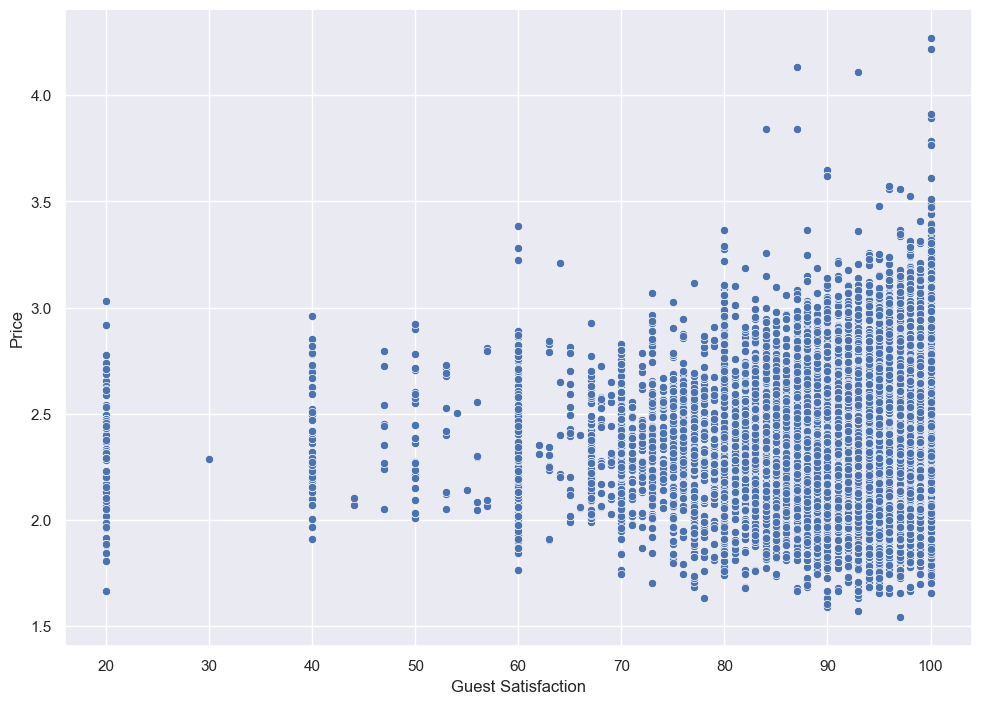

In [150]:
sns.scatterplot(
    x='Guest Satisfaction',
    y=df_log['Price'], 
    data=df,
    palette='light',
    legend='full'
);

[Text(0.5, 1.0, 'Guest satisfaction - Price')]

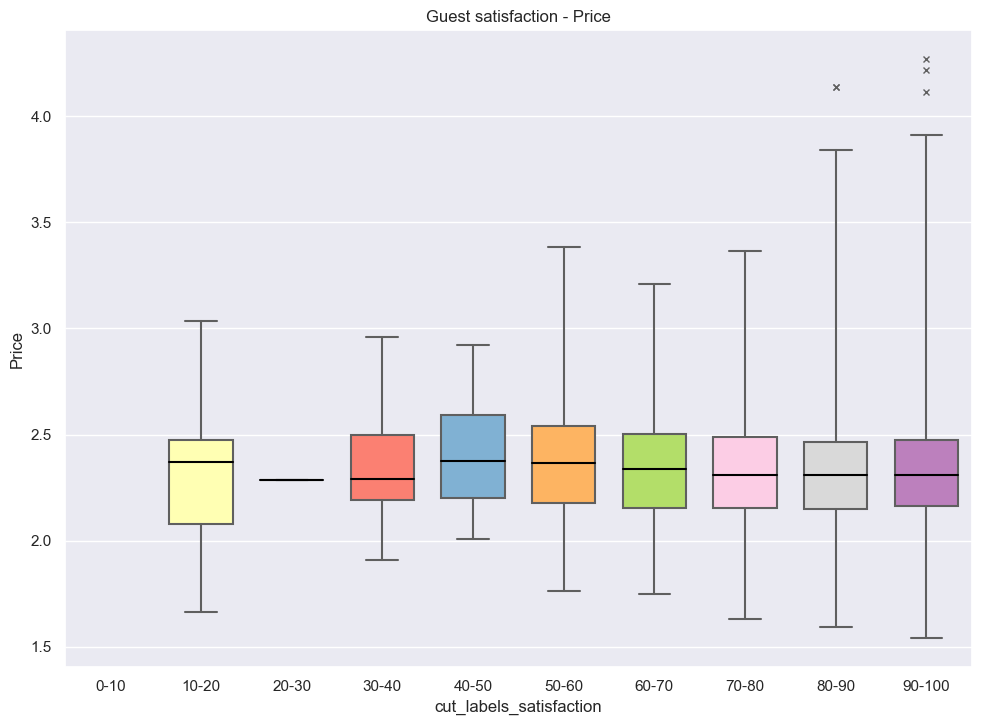

In [151]:
sns.boxplot(data=df, 
            x='cut_labels_satisfaction', 
            y=df_log['Price'], 
            palette='Set3',
            saturation=1,
            width=0.7,
            whis=5,
            medianprops={"color": "black"},
            flierprops={"marker": "x"}
           ).set(title='Guest satisfaction - Price')

Sometimes I thought if the flat or house has a great satisfaction score rent price could be hire cause people mostly looking at the rating first of all. I was wrong. Follow the represented boxplot above I can conclude that prices mostly doesn't depend on the rating. But we can admit that  for the high rated objects price range much higher.

## Distance to the city center and price

[Text(0.5, 1.0, 'Guest satisfaction - Price')]

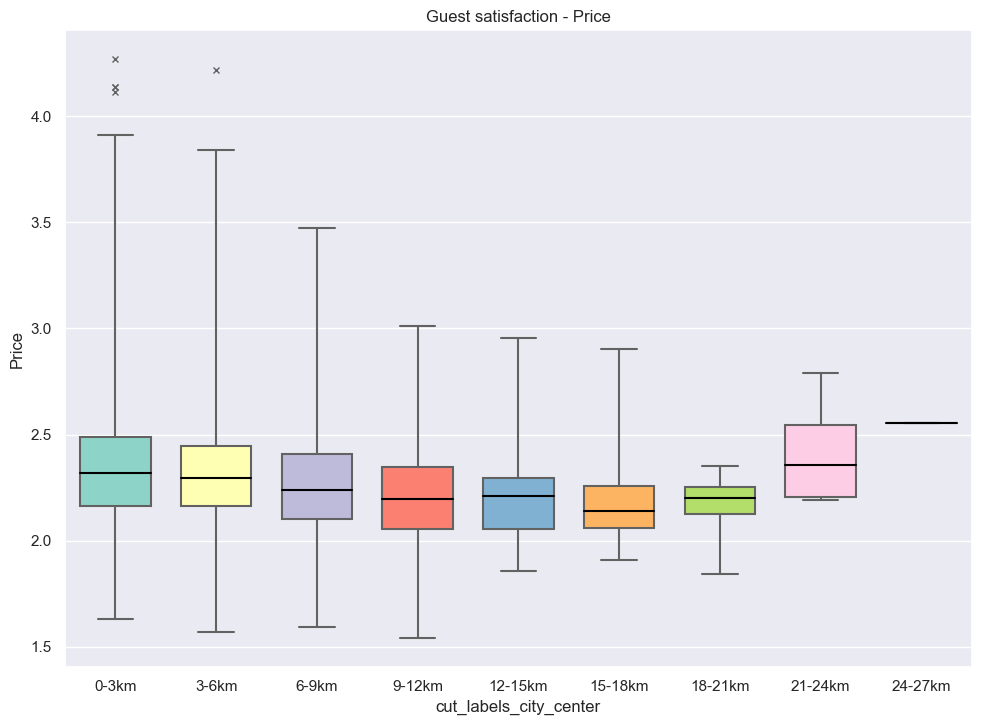

In [152]:
sns.boxplot(data=df, 
            x='cut_labels_city_center', 
            y=df_log['Price'], 
            palette='Set3',
            saturation=1,
            width=0.7,
            whis=5,
            medianprops={"color": "black"},
            flierprops={"marker": "x"}
           ).set(title='Guest satisfaction - Price')

Look at this plot. Prices mainly go down follow the distance from the city center. It's rather obvious.
A huge number of expensive objects in area up to 10km.

## Conclusions

# Machine learning (target: Guest Satisfaction)

In [19]:
df = pd.read_csv('Aemf1.csv')
df.head(1)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473


## PyCaret

In [182]:
from pycaret.regression import *

s = setup(
    df,
    target="Guest Satisfaction"
)

,Description,Value
0,Session id,1263
1,Target,Guest Satisfaction
2,Target type,Regression
3,Original data shape,"(41714, 19)"
4,Transformed data shape,"(41714, 29)"
5,Transformed train set shape,"(29199, 29)"
6,Transformed test set shape,"(12515, 29)"
7,Ordinal features,1
8,Numeric features,12
9,Categorical features,3


In [184]:
best = compare_models(sort="R2", cross_validation=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.9154,22.1493,4.7032,0.6689,0.0640,0.0351,0.1000
et,Extra Trees Regressor,2.8330,22.9585,4.7878,0.6573,0.0648,0.0339,0.1910
xgboost,Extreme Gradient Boosting,3.3909,27.0026,5.1946,0.5960,0.0691,0.0405,0.1000
catboost,CatBoost Regressor,3.3952,27.2152,5.2149,0.5929,0.0694,0.0407,0.1540
lightgbm,Light Gradient Boosting Machine,3.4522,28.5438,5.3405,0.5733,0.0723,0.0418,0.0650
gbr,Gradient Boosting Regressor,3.5500,30.4625,5.5167,0.5447,0.0752,0.0432,0.1110
lr,Linear Regression,3.6967,32.8302,5.7267,0.5098,0.0815,0.0460,0.2110
ridge,Ridge Regression,3.6967,32.8302,5.7267,0.5098,0.0815,0.0460,0.0500
br,Bayesian Ridge,3.6962,32.8300,5.7267,0.5098,0.0816,0.0460,0.0590
llar,Lasso Least Angle Regression,3.9221,36.1789,6.0114,0.4605,0.0866,0.0494,0.0510


Let's believe to PyCaret and let's evaluate suggested Random Forest model.

## Data preprocessing

In [2]:
df = pd.read_csv('Aemf1.csv')
df.head(1)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473


Converting spaces and to lower case

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.head(1)

,city,price,day,room_type,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,restraunt_index,normalised_restraunt_index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.53938,78.690379,4.166708,98.253896,6.846473


In [4]:
df.dtypes

city                            object
price                          float64
day                             object
room_type                       object
shared_room                       bool
private_room                      bool
person_capacity                float64
superhost                         bool
multiple_rooms                   int64
business                         int64
cleanliness_rating             float64
guest_satisfaction             float64
bedrooms                         int64
city_center_km                 float64
metro_distance_km              float64
attraction_index               float64
normalised_attraction_index    float64
restraunt_index                float64
normalised_restraunt_index     float64
dtype: object

Here we have 3 columns with boolen types of data. I prefer to convert such type of data into string or binominal type of data.

In [5]:
df['shared_room'] = df['shared_room'].map({True: 'True', False: 'False'}) # Replace boolean by string
df['private_room'] = df['private_room'].map({True: 'True', False: 'False'})
df['superhost'] = df['superhost'].map({True: 'True', False: 'False'}) 

Now we need to encode our categoral features. I propose to make it with Label Encoder. It's a great tool for converting categorical features.

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df.city) 
df.city = le.transform(df.city)

le.fit(df.day) 
df.day = le.transform(df.day)

le.fit(df.room_type) 
df.room_type = le.transform(df.room_type)

le.fit(df.shared_room) 
df.shared_room = le.transform(df.shared_room)

le.fit(df.private_room) 
df.private_room = le.transform(df.private_room)

le.fit(df.superhost) 
df.superhost = le.transform(df.superhost)

In [7]:
df.head()

,city,price,day,room_type,shared_room,private_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,restraunt_index,normalised_restraunt_index
0,0,194.033698,0,1,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,0,344.245776,0,1,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,0,264.101422,0,1,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,0,433.529398,0,1,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,0,485.552926,0,1,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [8]:
numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']
numerical_columns

['city',
 'price',
 'day',
 'room_type',
 'shared_room',
 'private_room',
 'person_capacity',
 'superhost',
 'multiple_rooms',
 'business',
 'cleanliness_rating',
 'guest_satisfaction',
 'bedrooms',
 'city_center_km',
 'metro_distance_km',
 'attraction_index',
 'normalised_attraction_index',
 'restraunt_index',
 'normalised_restraunt_index']

Now we're ready for machine learning part

## Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors

Mean Absolute Percentage Error is the mean of the absolute value of the errors shown in percentage

Mean Squared Error (MSE) is the mean of the squared errors

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors


-MAE is the easiest to understand, because it's the average error

-MAPE is the same as MAE but shows percentage

-MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world

-RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units

All of these are loss functions, because we want to minimize them

## Preparing data

In [9]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score
from sklearn.metrics import classification_report

X = numerical_columns
X.remove('guest_satisfaction')

y = ['guest_satisfaction']

In [11]:
train, test = train_test_split(df,test_size=0.3,random_state=42, shuffle=True)

## Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(train[X], train[y])

test_pred = rf_reg.predict(test[X])
train_pred = rf_reg.predict(train[X])

print('Test set evaluation:\n_____________________________________')
print_evaluate(test[y], test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(train[y], train_pred)

results_df = pd.DataFrame(data=[["Random Forest Regression", *evaluate(test[y], test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Test set evaluation:
_____________________________________
MAE: 2.76909093088294
MSE: 19.47967343531762
RMSE: 4.413578302841994
R2 Square 0.7084538905508815
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0318587280386315
MSE: 2.7416577031062705
RMSE: 1.6557951875477446
R2 Square 0.958497290926982
__________________________________


## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train[X],train[y])

test_pred = lin_reg.predict(test[X])
train_pred = lin_reg.predict(train[X])

print('Test set evaluation:\n_____________________________________')
print_evaluate(test[y], test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(train[y], train_pred)

results_df_temp = pd.DataFrame(data=[["Linear Regression", *evaluate(test[y], test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 3.666045560705498
MSE: 31.606484965861785
RMSE: 5.621964511259546
R2 Square 0.5269557389780333
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.7160082289370586
MSE: 32.952121110938585
RMSE: 5.740393811485287
R2 Square 0.5011768630866429
__________________________________


## Stohastic Gradient Descent

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.000001, max_iter=10000)
sgd_reg.fit(train[X], train[y])

test_pred = sgd_reg.predict(test[X])
train_pred = sgd_reg.predict(train[X])

print('Test set evaluation:\n_____________________________________')
print_evaluate(test[y], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(train[y], train_pred)

results_df_temp = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(test[y], test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 4.224360565890855
MSE: 40.36880504624517
RMSE: 6.353645020478022
R2 Square 0.39581286650297376
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.268223084743073
MSE: 41.899072050999564
RMSE: 6.472949254474313
R2 Square 0.36573956851292155
__________________________________


## XGBoost

In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=10000)
xgb_reg.fit(train[X], train[y])

test_pred = xgb_reg.predict(test[X])
train_pred = xgb_reg.predict(train[X])

print('Test set evaluation:\n_____________________________________')
print_evaluate(test[y], test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(train[y], train_pred)

results_df_temp = pd.DataFrame(data=[["XGBoost", *evaluate(test[y], test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

[15:39:41] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "eta0", "max_iter", "n_iter_no_change" } are not used.

Test set evaluation:
_____________________________________
MAE: 3.3065851204689625
MSE: 24.945077669470834
RMSE: 4.994504747166713
R2 Square 0.6266549144887282
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.7551947060364266
MSE: 16.031457124369282
RMSE: 4.0039302097275975
R2 Square 0.7573187563511569
__________________________________


## Models comparison

In [24]:
results_df.reset_index()

,Model,MAE,MSE,RMSE,R2 Square
0,Random Forest Regression,2.769091,19.479673,4.413578,0.708454
1,Linear Regression,3.666046,31.606485,5.621965,0.526956
2,Stochastic Gradient Descent,4.224361,40.368805,6.353645,0.395813
3,XGBoost,3.306585,24.945078,4.994505,0.626655


<Axes: ylabel='Model'>

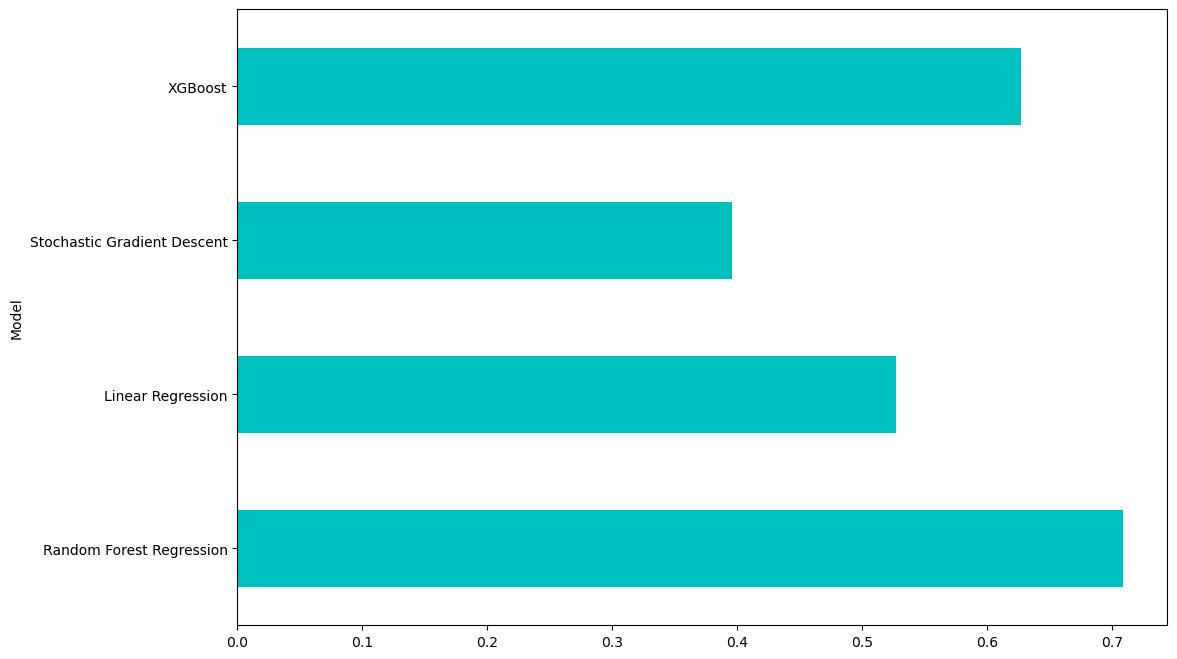

In [30]:
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), color='c')

# Summary

First of all, let me thank you for paying attention to my notebook and watching it to the end.

Perhaps I will add more to this work in the future. I would be grateful if you leave comments, support with a thumbs up.

I wish you all the best and success in your work and creativity! Good luck!